In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

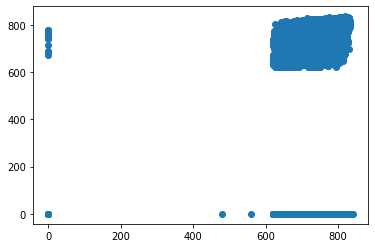

In [4]:
plt.scatter(train['borrower_credit_score'],train['co-borrower_credit_score'])
plt.show()

In [5]:
test=pd.read_csv("test.csv")
test['m13']=0
dataset=pd.concat([train,test],axis=0,sort=False)
dataset.shape

(151924, 29)

In [6]:
#count of zeros in borrower_credit_score column
dataset.shape[0]-dataset['borrower_credit_score'].astype(bool).sum(axis=0)

65

In [7]:
#count of zeros in co-borrower_credit_score column
dataset.shape[0]-dataset['co-borrower_credit_score'].astype(bool).sum(axis=0)

61734

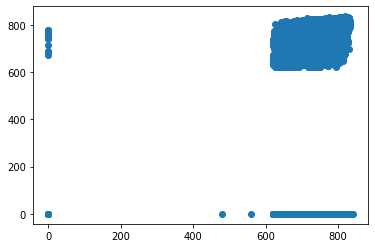

In [8]:
plt.scatter(train['borrower_credit_score'],train['co-borrower_credit_score'])
plt.show()

In [9]:
dataset.drop('co-borrower_credit_score',axis=1,inplace=True)
dataset.drop('loan_id',axis=1,inplace=True)

In [10]:
dataset.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5',
       'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [11]:
b_mean= dataset['borrower_credit_score'].mean()
borrower_cr= dataset['borrower_credit_score']
borrower_cr=np.array(borrower_cr)
for i in range(borrower_cr.shape[0]):
    if borrower_cr[i]==0:
        borrower_cr[i]=b_mean
borrower_cr=pd.Series(borrower_cr)
dataset['borrower_credit_score']=borrower_cr
dataset['borrower_credit_score'].astype(bool).sum(axis=0)

151924

In [12]:
dataset.shape

(151924, 27)

In [13]:
dataset.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5',
       'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [14]:
#count of zeros in insurance_percent column
dataset.shape[0]-dataset['financial_institution'].astype(bool).sum(axis=0)

0

In [15]:
dataset.isnull().values.any()

False

In [16]:
dataset.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5',
       'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [17]:
dataset.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,...,0,0,0,1,0,0,0,0,0,1
1,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,...,0,0,0,0,0,0,0,1,0,1
2,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,...,0,0,0,0,0,0,0,0,0,1
3,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,...,0,0,0,0,0,1,1,1,1,1
4,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,...,3,4,5,6,7,8,9,10,11,1


In [18]:
numerical_dataset=dataset.drop(['source','financial_institution','origination_date','first_payment_date','loan_purpose','m13'],axis=1)
numerical_dataset.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,insurance_type,m1,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,0.0,0,...,0,0,0,0,0,0,1,1,1,1
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0,...,2,3,4,5,6,7,8,9,10,11


In [19]:
corr = numerical_dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
interest_rate,1,-0.00178134,0.719908,0.271341,-0.128935,0.183199,-0.171448,0.140851,0.0537628,0.0165105,0.0235361,0.024444,0.0256349,0.0318247,0.0317996,0.0312947,0.0350201,0.0346563,0.0370009,0.0366009,0.0387373
unpaid_principal_bal,-0.00178134,1,0.193733,0.0631846,0.130407,0.0720663,0.0421628,0.0107121,0.0157107,0.000555208,-0.0023809,-0.00539679,-0.00902368,-0.0099489,-0.00635481,-0.00689613,-0.00763223,-0.00833808,-0.00609978,-0.00647809,-0.00752818
loan_term,0.719908,0.193733,1,0.290719,-0.108534,0.138139,-0.0573419,0.190243,0.0283971,0.00844801,0.0113553,0.00928091,0.00959541,0.0117297,0.0116017,0.0119464,0.0135086,0.0143088,0.0157947,0.0150163,0.0159021
loan_to_value,0.271341,0.0631846,0.290719,1,-0.100085,0.124938,-0.112579,0.489426,0.075552,0.00273041,0.00837977,0.00577135,0.0068949,0.00591358,0.0100763,0.0106548,0.01071,0.0106667,0.011909,0.0115891,0.0124985
number_of_borrowers,-0.128935,0.130407,-0.108534,-0.100085,1,-0.135411,0.095795,-0.0573045,-0.0151619,-0.0177353,-0.0194407,-0.0164936,-0.0211602,-0.0217551,-0.0213302,-0.0230095,-0.0266459,-0.0268474,-0.0261907,-0.0269933,-0.0281124
debt_to_income_ratio,0.183199,0.0720663,0.138139,0.124938,-0.135411,1,-0.151462,0.065107,0.0151389,0.0130914,0.0131083,0.0127458,0.0149663,0.0193764,0.0191831,0.0195636,0.0231223,0.0213282,0.0232276,0.0242704,0.0236894
borrower_credit_score,-0.171448,0.0421628,-0.0573419,-0.112579,0.095795,-0.151462,1,-0.0494058,-0.00375865,-0.0250709,-0.0324801,-0.0334559,-0.0428325,-0.0497743,-0.0534485,-0.0548249,-0.0550899,-0.0526936,-0.0519529,-0.051728,-0.0526996
insurance_percent,0.140851,0.0107121,0.190243,0.489426,-0.0573045,0.065107,-0.0494058,1,0.145247,-0.00403379,0.000873529,-0.00385768,-0.00116826,-0.0022835,-0.000494882,-0.00130673,-0.00101786,0.000290117,0.00024949,0.000549217,0.00333193
insurance_type,0.0537628,0.0157107,0.0283971,0.075552,-0.0151619,0.0151389,-0.00375865,0.145247,1,0.000864931,0.00208129,0.00422106,-9.89258e-05,0.00196172,0.00200498,-0.00231832,0.000808986,-0.00143869,0.00233209,-0.00101677,-0.00125262
m1,0.0165105,0.000555208,0.00844801,0.00273041,-0.0177353,0.0130914,-0.0250709,-0.00403379,0.000864931,1,0.293496,0.25046,0.208242,0.191606,0.145784,0.13864,0.116691,0.1217,0.111212,0.108712,0.0917683


In [20]:
#Change if req
################################################################
# dataset.drop(['m8','m10','m12'],axis=1,inplace=True)
################################################################

In [21]:
dataset.drop(['origination_date','first_payment_date'],axis=1,inplace=True)

In [22]:
dataset.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'insurance_type', 'm1', 'm2', 'm3',
       'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [23]:
dataset.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,95,1.0,22.0,694.0,C86,...,0,0,0,1,0,0,0,0,0,1
1,Y,"Swanson, Newton and Miller",4.875,144000,360,72,1.0,44.0,697.0,B12,...,0,0,0,0,0,0,0,1,0,1
2,Z,Thornton-Davis,3.250,366000,180,49,1.0,33.0,780.0,B12,...,0,0,0,0,0,0,0,0,0,1
3,X,OTHER,4.750,135000,360,46,2.0,44.0,633.0,B12,...,0,0,0,0,0,1,1,1,1,1
4,X,OTHER,4.750,124000,360,80,1.0,43.0,681.0,C86,...,3,4,5,6,7,8,9,10,11,1


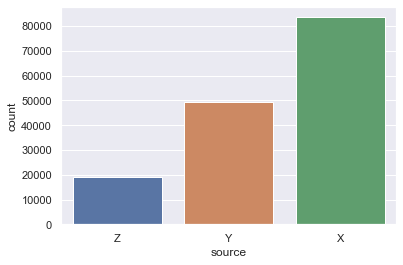

In [24]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(dataset['source'])

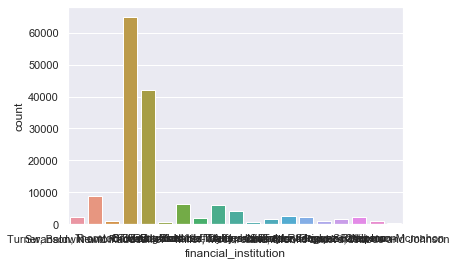

In [25]:
sns.set(style="darkgrid")
ax = sns.countplot(dataset['financial_institution'])

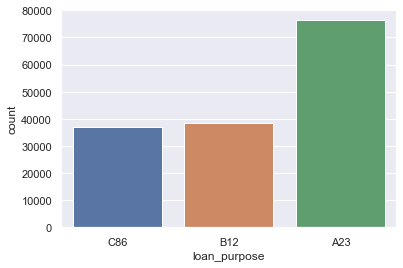

In [26]:
sns.set(style="darkgrid")
ax = sns.countplot(dataset['loan_purpose'])

In [27]:
dataset.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,95,1.0,22.0,694.0,C86,...,0,0,0,1,0,0,0,0,0,1
1,Y,"Swanson, Newton and Miller",4.875,144000,360,72,1.0,44.0,697.0,B12,...,0,0,0,0,0,0,0,1,0,1
2,Z,Thornton-Davis,3.250,366000,180,49,1.0,33.0,780.0,B12,...,0,0,0,0,0,0,0,0,0,1
3,X,OTHER,4.750,135000,360,46,2.0,44.0,633.0,B12,...,0,0,0,0,0,1,1,1,1,1
4,X,OTHER,4.750,124000,360,80,1.0,43.0,681.0,C86,...,3,4,5,6,7,8,9,10,11,1


In [28]:
dummy=pd.get_dummies(dataset['source'])
dataset.drop('source',axis=1,inplace=True)
dataset=pd.concat([dummy,dataset],axis=1,sort=False)
dataset.head()

,X,Y,Z,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,0,0,1,"Turner, Baldwin and Rhodes",4.250,214000,360,95,1.0,22.0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,"Swanson, Newton and Miller",4.875,144000,360,72,1.0,44.0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,Thornton-Davis,3.250,366000,180,49,1.0,33.0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,OTHER,4.750,135000,360,46,2.0,44.0,...,0,0,0,0,0,1,1,1,1,1
4,1,0,0,OTHER,4.750,124000,360,80,1.0,43.0,...,3,4,5,6,7,8,9,10,11,1


In [29]:
dummy=pd.get_dummies(dataset['financial_institution'])
dataset.drop('financial_institution',axis=1,inplace=True)
dataset=pd.concat([dummy,dataset],axis=1,sort=False)
dataset.head()

,Anderson-Taylor,Browning-Hart,Chapman-Mcmahon,"Cole, Brooks and Vincent",Edwards-Hoffman,"Martinez, Duffy and Bird","Miller, Mcclure and Allen",Nicholson Group,OTHER,Richards-Walters,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1
4,0,0,0,0,0,0,0,0,1,0,...,3,4,5,6,7,8,9,10,11,1


In [30]:
dummy=pd.get_dummies(dataset['loan_purpose'])
dataset.drop('loan_purpose',axis=1,inplace=True)
dataset=pd.concat([dummy,dataset],axis=1,sort=False)
dataset.head()

,A23,B12,C86,Anderson-Taylor,Browning-Hart,Chapman-Mcmahon,"Cole, Brooks and Vincent",Edwards-Hoffman,"Martinez, Duffy and Bird","Miller, Mcclure and Allen",...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
4,0,0,1,0,0,0,0,0,0,0,...,3,4,5,6,7,8,9,10,11,1


In [31]:
dataset.columns

Index(['A23', 'B12', 'C86', 'Anderson-Taylor', 'Browning-Hart',
       'Chapman-Mcmahon', 'Cole, Brooks and Vincent', 'Edwards-Hoffman',
       'Martinez, Duffy and Bird', 'Miller, Mcclure and Allen',
       'Nicholson Group', 'OTHER', 'Richards-Walters', 'Richardson Ltd',
       'Romero, Woods and Johnson', 'Sanchez, Hays and Wilkerson',
       'Sanchez-Robinson', 'Suarez Inc', 'Swanson, Newton and Miller',
       'Taylor, Hunt and Rodriguez', 'Thornton-Davis',
       'Turner, Baldwin and Rhodes', 'X', 'Y', 'Z', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5',
       'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [32]:
dataset['unpaid_principal_bal']=dataset['unpaid_principal_bal']/1000000
dataset['loan_term']=dataset['loan_term']/360
dataset['interest_rate']=dataset['interest_rate']/100
dataset['loan_to_value']=dataset['loan_to_value']/100
dataset['number_of_borrowers']=dataset['number_of_borrowers']/10
dataset['debt_to_income_ratio']=dataset['debt_to_income_ratio']/100
dataset['borrower_credit_score']=dataset['borrower_credit_score']/1000
dataset['insurance_type']=dataset['insurance_type']/10
# dataset['m1']=dataset['m1']/100
# dataset['m2']=dataset['m2']/100
# dataset['m3']=dataset['m3']/100
# dataset['m4']=dataset['m4']/100
# dataset['m5']=dataset['m5']/100
# dataset['m6']=dataset['m6']/100
# dataset['m7']=dataset['m7']/100
# dataset['m8']=dataset['m8']/100
# dataset['m9']=dataset['m9']/100
# dataset['m10']=dataset['m10']/100
# dataset['m11']=dataset['m11']/100
# dataset['m12']=dataset['m12']/100

In [33]:
y=dataset['m13']
dataset.drop('m13',axis=1,inplace=True)
y_train=y[:train.shape[0]]
x_train=dataset[:train.shape[0]]
x_test=dataset[train.shape[0]:]

In [34]:
print(x_train.shape,y_train.shape)

(116058, 46) (116058,)


In [35]:
print(x_test.shape,test.shape)

(35866, 46) (35866, 29)


In [36]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=7)
# neigh.fit(x_train,y_train) 
# y_pred= neigh.predict(x_test)

In [37]:
# np.unique(y_pred)

In [38]:
# y_pred=pd.Series(y_pred)
# sample=pd.read_csv("sample.csv")
# sample['m13']=y_pred
# sample.to_csv('Submission.csv',index=False)

# Random Forest

In [39]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=100,random_state=0)
# clf.fit(x_train, y_train)
# y_pred_rf=clf.predict(x_test)
# y_pred=pd.Series(y_pred)
# sample=pd.read_csv("sample.csv")
# sample['m13']=y_pred
# sample.to_csv('RF_Submission.csv',index=False)

In [40]:
# np.unique(y_pred)

# Neural Net

In [41]:
import keras
from keras.layers import Dense,Activation,GaussianNoise
from keras.models import Sequential

Using TensorFlow backend.


In [42]:
model=Sequential()
model.add(Dense(7, input_shape=(x_train.shape[1],)))
model.add(GaussianNoise(0.1))
model.add(Activation('linear'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

W0820 01:35:38.038362 20800 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 01:35:38.077743 20800 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 01:35:38.078773 20800 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 01:35:38.119299 20800 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorfl

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7)                 329       
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 7)                 0         
_________________________________________________________________
activation_1 (Activation)    (None, 7)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

W0820 01:35:38.189257 20800 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 01:35:38.246177 20800 deprecation.py:323] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [44]:
model.fit(x_train,y_train,batch_size= 64 ,epochs=8)

Epoch 1/8
116058/116058 [==============================] - 5s 43us/step - loss: 0.0687 - acc: 0.9887
Epoch 2/8
116058/116058 [==============================] - 5s 44us/step - loss: 0.0231 - acc: 0.9958
Epoch 3/8
116058/116058 [==============================] - 7s 63us/step - loss: 0.0218 - acc: 0.9959
Epoch 4/8
116058/116058 [==============================] - 8s 71us/step - loss: 0.0212 - acc: 0.9960
Epoch 5/8
116058/116058 [==============================] - 8s 69us/step - loss: 0.0211 - acc: 0.9960
Epoch 6/8
116058/116058 [==============================] - 8s 72us/step - loss: 0.0211 - acc: 0.9960
Epoch 7/8
116058/116058 [==============================] - 8s 72us/step - loss: 0.0208 - acc: 0.9960
Epoch 8/8
116058/116058 [==============================] - 8s 72us/step - loss: 0.0208 - acc: 0.9961


In [45]:
y_test=model.predict_classes(x_test)
type(y_test)

numpy.ndarray

In [46]:
sample=pd.read_csv("sample.csv")
sample['m13']=y_test

In [47]:
sample['m13'].nunique()

2

In [48]:
sample.to_csv('nn_sub.csv',index=False)